# NBA Players Injury Analysis

# Introduction
The NBA has changed from the early 90's. Players seem stronger, bigger and faster. Rules like hand-checking no longer exist, the 3 pointer has become a key focus to winning a championship(Golden State Warriors in 2014-15). One thing common in the NBA from then and now is injuries.

Injuries are detrimental to any team. When a Star Player gets injured the cost is not only potential wins but millions of dollars lost from injured players salaries and potential tickets sales. Fans don't want to pay for the price of admission to watch their star player on the bench in street clothes. 

Kobe Bryant sustains Achilles Injury in 2013: 
    - miss 73 games
    - Salary: 30,453,805 
    - Cost to LA Lakers: 
        - 73  * 370,000/game = $28,000,000

Derrick Rose following MVP year sustains knee injury

    - 2011-2014 Yearly salary: 17,632,688 Games missed: 43(2011), 82(all of 2012), 61(2013)  (knee injury)
        - Per game salary: roughly 215,000
        - Cost to team: ~ 40,000,000


# Goal
Create a list of key features that attribute to high injury rates. To do this I will focus on games played for each player in a season and Average per game Player stats. This list will help provide the coaching staff with insights/indicators to focus on monitoring the health of a player based on their stats and adjust accordingly to maximize games played in a season.




# Data Gathering 
1. Scrape Regular Season NBA stats from NBA.com.
    - TRADITIONAL STATS
    - ADVANCED STATS
    - SHOOTING STATS 
    - OPPONENT SHOOTING STATS
    - PLAYER BIOS
    - TEAM SCHEDULE GAME LOGS
    
# Approach 
Divide the data into 3 separate blocks from 3 different eras. Each block consists of 5 years of NBA player data with attributes listed below. The target variable will be Games played per season. I want to analyze games played with the list of attributes using the following models: Linear Regression, Lasso, Ridge and Elastinet. 

EDA: Exploratory data analysis
- I originally started with 67 different possible attributes. I Removed redundant variables like shot selection beyond 25 feet since 3 point stats were already included. Also, I removed high correlated variables with the use of a Heat map and Pairplot, narrowing down my attributes to 57. 


    

### 3 Main blocks of data representing 3 different NBA eras. 


| datasets  |  5 years of accumulated data    | Target|
|----|----|----|
| block1: Michael Jordan Era | 1996-97,  1997-98,  1999-00,  2000-01,  2001-02 | Games Played per player from 1996 to 2002 |   
| block2: Kobe Bryant Era | 2004-05,  2005-06,  2006-07,  2007-08,  2008-09 | Games Played per player from 2004 to 2009 |
| block3: Lebron James Era | 2010-11,  2012-13,  2013-14,  2014-15,  2015-16 | Games Played per player from 2010 to 2016 |
(Excluding Lockout shortened NBA seasons 1998-99 and 2011-12)



## Data Dictionary 

|  Category  | Description   | Attributes(67 Total) |
|----|----|----|
| Average Player Stats | Field Goal | FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT |
| |Free Throw | FTM, FTA, FT_PCT |
|  |Rebounds |OREB, DREB, REB |
|  |Assists & Turnovers | AST, TOV |
|  |Defense stats |STL, BLK, BLKA |
|  |Fouls, Fouls Drawn |PF, PFD|
|  | Points| PTS |
|  | Minutes played per game |MIN |
|  |  |  |
|Shot selection |Less than 5ft |lessthan5ft_FGM, lessthan5ft_FGA, lessthan5ft_FG_PCT |
|  |5-9 ft range | 5_9ft_FGM, 5_9ft_FGA, 5_9ft_FG_PCT |
|  |10-14 ft range| 10_14ft_FGM, 10_14ft_FGA, 10_14ft_FG_PCT |
|  |15-19ft range| 15_19ft_FGM, 15_19ft_FGA, 15_19ft_FG_PCT |
|  |20-24ft range| 20_24ft_FGM, 20_24ft_FGA, 20_24ft_FG_PCT |
|  |  |  |
| Opponent shot selection  | Less than 5ft | opp_lessthan5ft_FGM, opp_lessthan5ft_FGA, opp_lessthan5ft_FG_PCT |
|  |  |  |
| Pct shot by type | PCT of 2 Pointers | PCT_FGA_2PT, PCT_PTS_2PT, PCT_PTS_2PT_MR, PCT_AST_2PM|
|  |  |  |
|  | PCT of 3 Pointers  | PCT_FGA_3PT, PCT_PTS_3PT |    
|  |  PCT of Points(Fast Break) | PCT_PTS_FB |
|  | PCT of Points(Free Throws) | PCT_PTS_FT |
|  | PCT of Points(Turnovers) | PCT_PTS_OFF_TOV |
|  | PCT of Points(Inside the Paint) | PCT_PTS_PAINT |
|  |  |  |
| Schedule  | Total back to back games | B2B_COUNT |
|  | Total count of 3 games played in 4 days | 3GMS_IN_4DAYS |
|  | Total count of 4 games played in 5 days | 4GMS_IN_5DAYS |
|  |  |  |
| Player Bios | Height, Weight, Age |  PLAYER_HEIGHT_INCHES, PLAYER_WEIGHT, AGE |
|  |  |  |
| Player Impact Estimate | Player's overall statistical contribution against total statistics in games they play in.| PIE |
|  |  |  |
| PACE | The number of possessions per 48 minutes for a team or player | PACE |
|  |  |  |
| Plus/Minus | Point differential of the score for a player while on the court | PLUS_MINUS |
|  |  |  |
| Assisted/Unassisted Points | Pecentage of assisted/unassisted points | PCT_UAST_2PM, PCT_AST_3PM, PCT_UAST_3PM, PCT_AST_FGM, PCT_UAST_FGM|
|  |  |  |
| Usage metrics | An estimate of the percentage of team plays used by a player while he was on the floor. | USG_PCT |
|  |  |  |
| True shooting percentage | Measures a player's efficiency at shooting the ball. TS_PCT = PTS / (2 * (FGA + 0.44 * FTA)) | TS_PCT |
|  |  |  |
| Net Rating | On player level this statistic is the team's point differential per 100 possessions while he is on court | NET_RATING
|  |  |  |
| Win Percentage | The percentage of games a team or player has won  | W_PCT |


Note: 
- Removed following Shot Selection variables: 
    - 25_29ft_FGM, 25_29ft_FGA, 25_29ft_FG_PCT, 30_34ft_FGM, 30_34ft_FGA, 30_34ft_FG_PCT, 35_39ft_FGM
        - Shot Selection beyond 25 ft is redundant since taken care of by 3 point stats: FG3M, FG3A, FG3_PCT
        

- Removed variables from Opponent Shot Selection: 
    - opp_5_9ft_FGM, opp_5_9ft_FGA, opp_5_9ft_FG_PCT, opp_10_14ft_FGM, opp_10_14ft_FGA, opp_10_14ft_FG_PCT, opp_15_19ft_FGM, opp_15_19ft_FGA, opp_15_19ft_FG_PCT, opp_20_24ft_FGM, opp_20_24ft_FGA, opp_20_24ft_FG_PCT, opp_25_29ft_FGM, opp_25_29ft_FGA, opp_25_29ft_FG_PCT, opp_30_34ft_FGM,  opp_30_34ft_FGA, opp_30_34ft_FG_PCT 
        - High injury counts occur within 5 ft of basket, so I chose to leave out 5ft and beyond variables.
          

- Predictors from inital goal that I chose to leave out:
    - Team travel time during season: too difficult
    - position(dummy coded columns: 'G', 'F', 'C'): 
        - difficult due to players who play multiple positions. Draymond Green in a single game played
        multiple positions including small forward, power forward and center.Paul George played shooting gaurd, 
        small forward and Power forward last year. Also, the Golden State warriors 'small ball' lineup- a 
        lineup consisiting of no 'true' center- has caused a trend away from playing traditional line-ups. 
        Positions like shooting gaurd and small forward are interchangeable as well as power forwards and centers.
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:

file_name = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/merged_per_year/merged_%s.csv'

# function used to subset players according to team and minutes played per player
def top_players(df, num_of_players=10, column=['MIN'], min_games=15):
    df = df[df.GP >= min_games]
    return df.sort_values(by=column, ascending=False)[:num_of_players]

# returns data Frame of data set of each Era
def data_block(yrs_list=['2001', '2002', '2003', '2004', '2005', '2006']):

    start = int(yrs_list[0])
    end = int(yrs_list[-1])
    
    years = [str(i) + '-' + str(int(i)+1)[-2:] for i in yrs_list]
    #===> ['2001-02', '2002-03', '2003-04', '2004-05', '2005-06']
    
    # trainning data set(5 years)
    df_list = []
    for y in years:
        df = pd.read_csv(file_name % y)
        df.drop(['W','L', 'SEASON'], axis=1, inplace=True)
        df.dropna(inplace=True)
        
        # convert height and weight to Integer
        try:
            df.PLAYER_WEIGHT = df.PLAYER_WEIGHT.map(lambda x: int(x))
        except:
            pass

        try:
            df.PLAYER_HEIGHT_INCHES = df.PLAYER_HEIGHT_INCHES.map(lambda x: int(x))
        except:
            pass
 
        df_list.append(df)

    # Subsetting players for each year in df_list that play significant minutes
    subsets = [df.groupby('TEAM_ABBREVIATION').apply(top_players) for df in df_list]
    
    # Append all data frames in subsets  into a single data frame
    df_data = pd.DataFrame()
    for df in subsets:
        df_data = df_data.append(df[df.columns[5:]].reset_index(), ignore_index=True)
    
    # all data
    all_data_list = []
    for y in years:
        df = pd.read_csv(file_name % y)
        df.dropna(inplace=True)
        try:
            df.PLAYER_WEIGHT = df.PLAYER_WEIGHT.map(lambda x: int(x))
        except:
            pass

        try:
            df.PLAYER_HEIGHT_INCHES = df.PLAYER_HEIGHT_INCHES.map(lambda x: int(x))
        except:
            pass
 
        all_data_list.append(df)
    
    df_all = pd.DataFrame()
    for df in all_data_list:
        df_all = df_all.append(df, ignore_index=True)
        
    # removing redundant variables
    redundant_variables = ['DREB', '15_19ft_FGM', '20_24ft_FGM', '10_14ft_FGM','5_9ft_FGM', 'lessthan5ft_FGM',
                           'opp_lessthan5ft_FGM', 'PCT_UAST_2PM', 'PCT_UAST_FGM','PCT_PTS_3PT']
    # 'DREB' because directly correlated with 'REB'
    # 'PCT_PTS_3PT' because directly correlated with 'PCT_FGA_3PT'.
    #  FGM categories because directly correlated with FGA.

    df_data.drop(redundant_variables, axis=1, inplace=True)

    # train data set 2001-02 to 2005-06
    non_GP_columns = [col for col in df_data.columns[2:] if col != 'GP']
    block, gp = df_data[non_GP_columns], df_data.GP.values
          
    print "Block and Games played (total rows, total columns): ", block.shape, gp.shape
    print "Total data (rows, columns)", df_data.shape
    return df_all, block, gp
        


In [3]:
# All the data
years = ['2015-16', '2014-15', '2013-14', '2012-13', '2010-11', '2009-10', '2008-09', 
         '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02',
         '2000-01', '1999-00', '1997-98', '1996-97']
all_data_list = []
for y in years:
    df = pd.read_csv(file_name % y)
    df.dropna(inplace=True)
    try:
        df.PLAYER_WEIGHT = df.PLAYER_WEIGHT.map(lambda x: int(x))
    except:
        pass

    try:
        df.PLAYER_HEIGHT_INCHES = df.PLAYER_HEIGHT_INCHES.map(lambda x: int(x))
    except:
        pass

    all_data_list.append(df)

df_all = pd.DataFrame()
for df in all_data_list:
    df_all = df_all.append(df, ignore_index=True)

In [4]:
all_data_A, block_A, a_GP = data_block(['1996', '1997', '1999', '2000', '2001'])

Block and Games played (total rows, total columns):  (1450, 57) (1450,)
Total data (rows, columns) (1450, 60)


In [5]:
all_data_B, block_B, b_GP = data_block(['2003','2004', '2005', '2006', '2007'])

Block and Games played (total rows, total columns):  (1490, 57) (1490,)
Total data (rows, columns) (1490, 60)


In [6]:
all_data_C, block_C, c_GP = data_block(['2010', '2012', '2013', '2014', '2015'])

Block and Games played (total rows, total columns):  (1500, 57) (1500,)
Total data (rows, columns) (1500, 60)


In [7]:
# Initialize the StandardScaler object
ss = StandardScaler()

# use the "fit_transform" function to normalize each Block matrix
block_An = ss.fit_transform(block_A)
block_Bn = ss.fit_transform(block_B)
block_Cn = ss.fit_transform(block_C)

# Modeling with Linear Regression, Ridge Regression and Lasso Regression

In [8]:
lr_A = LinearRegression(fit_intercept=True)
lr_B = LinearRegression()
lr_C = LinearRegression()

lr_A_scores = cross_val_score(lr_A, block_An, a_GP, cv=10)
lr_B_scores = cross_val_score(lr_B, block_Bn, b_GP, cv=10)
lr_C_scores = cross_val_score(lr_C, block_Cn, c_GP, cv=10)

print "Average R_squared scores for Block A: ", np.mean(lr_A_scores)
print "Average R_squared scores for Block B: ", np.mean(lr_B_scores)
print "Average R_squared scores for Block C: ", np.mean(lr_C_scores)

Average R_squared scores for Block A:  0.163771060686
Average R_squared scores for Block B:  0.17930001299
Average R_squared scores for Block C:  0.117788193111


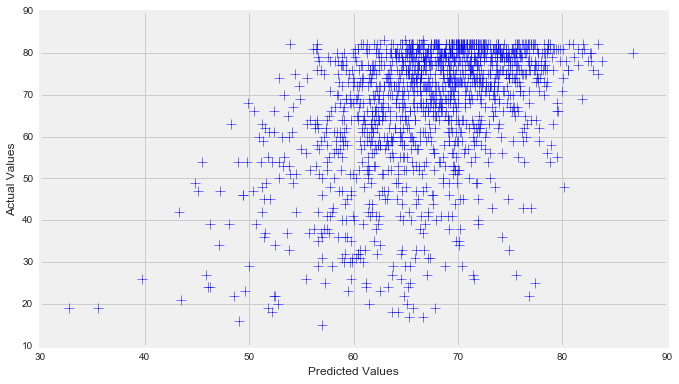

Mean squared error: 176.23


In [9]:
model_C = lr_C.fit(block_Cn, c_GP)
predict_C = model_C.predict(block_Cn)

fig = plt.figure(figsize=(10,6))
plt.scatter(predict_C, c_GP, s=100, c='b', marker='+')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print "Mean squared error: %.2f" % np.mean((predict_C - c_GP) ** 2)


In [11]:
lrA_coefs = pd.DataFrame({'variable': block_C.columns,
                            'lrC_coef':model_C.coef_,
                            'lrC_abs_coef':np.abs(model_C.coef_)})

lrA_coefs.sort_values('lrC_abs_coef', inplace=True, ascending=False)

lrA_coefs.head(25)

,lrC_abs_coef,lrC_coef,variable
23,2814.179581,2814.179581,PCT_FGA_2PT
24,2804.116434,2804.116434,PCT_FGA_3PT
30,83.760156,-83.760156,PCT_PTS_PAINT
25,79.861716,79.861716,PCT_PTS_2PT
26,47.994292,-47.994292,PCT_PTS_2PT_MR
21,12.501679,-12.501679,PTS
5,10.119454,-10.119454,FG_PCT
10,8.729709,8.729709,FTA
51,8.093539,8.093539,TS_PCT
2,6.763131,6.763131,MIN


In [12]:
lrC_coefs = pd.DataFrame({'variable': block_C.columns,
                            'lrC_coef':model_C.coef_,
                            'lrC_abs_coef':np.abs(model_C.coef_)})

lrC_coefs.sort_values('lrC_abs_coef', inplace=True, ascending=False)

lrC_coefs.head(25)

,lrC_abs_coef,lrC_coef,variable
23,2814.179581,2814.179581,PCT_FGA_2PT
24,2804.116434,2804.116434,PCT_FGA_3PT
30,83.760156,-83.760156,PCT_PTS_PAINT
25,79.861716,79.861716,PCT_PTS_2PT
26,47.994292,-47.994292,PCT_PTS_2PT_MR
21,12.501679,-12.501679,PTS
5,10.119454,-10.119454,FG_PCT
10,8.729709,8.729709,FTA
51,8.093539,8.093539,TS_PCT
2,6.763131,6.763131,MIN


## Problem: Overfitting 

# Ridge Regression

In [13]:
# range of alphas from 1 to 10^5
ridge_alphas = np.logspace(0, 5, 100)

# find optimal alpha using cross validation
A_optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
A_optimal_ridge.fit(block_An, a_GP)
B_optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
B_optimal_ridge.fit(block_Bn, b_GP)
C_optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
C_optimal_ridge.fit(block_Cn, c_GP)

print A_optimal_ridge.alpha_
print B_optimal_ridge.alpha_
print C_optimal_ridge.alpha_

10.235310219
132.194114847
236.448941265


In [14]:
# initialize Ridge with optimal alpha
A_ridge = Ridge(alpha=A_optimal_ridge.alpha_)
B_ridge = Ridge(alpha=B_optimal_ridge.alpha_)
C_ridge = Ridge(alpha=C_optimal_ridge.alpha_)

A_ridge.fit(block_An, a_GP)
B_ridge.fit(block_Bn, b_GP)
C_ridge.fit(block_Cn, c_GP)

A_ridge_scores = cross_val_score(A_ridge, block_An, a_GP, cv=10)
A_ridge_predict = A_ridge.predict(block_An)
A_rss = [sum((A_ridge_predict - a_GP)**2)]

B_ridge_scores = cross_val_score(B_ridge, block_Bn, b_GP, cv=10)
B_ridge_predict = B_ridge.predict(block_Bn)
B_rss = [sum((B_ridge_predict - b_GP)**2)]

C_ridge_scores = cross_val_score(C_ridge, block_Cn, c_GP, cv=10)
C_ridge_predict = C_ridge.predict(block_Cn)
C_rss = [sum((C_ridge_predict - c_GP)**2)]



print "Mean of R^2 scores for block A: ", np.mean(A_ridge_scores)
print "Residual Sum of squares for A: ", A_rss

print "Mean of R^2 scores for block B: ", np.mean(B_ridge_scores)
print "Residual Sum of squares for B: ", B_rss

print "Mean of R^2 scores for block C: ", np.mean(C_ridge_scores)
print "Residual Sum of squares for C: ", C_rss

Mean of R^2 scores for block A:  0.167684994685
Residual Sum of squares for A:  [262451.06883001234]
Mean of R^2 scores for block B:  0.195689960096
Residual Sum of squares for B:  [252267.18675727441]
Mean of R^2 scores for block C:  0.132824966625
Residual Sum of squares for C:  [272862.78658511356]


In [15]:
A_ridge_coefs = pd.DataFrame({'variable':block_A.columns,
                            'A_ridge_coef':A_ridge.coef_,
                            'A_ridge_abs_coef':np.abs(A_ridge.coef_)})

A_ridge_coefs.sort_values('A_ridge_abs_coef', inplace=True, ascending=False)

A_ridge_coefs.head(25)

,A_ridge_abs_coef,A_ridge_coef,variable
2,9.943779,9.943779,MIN
49,4.428996,4.428996,NET_RATING
10,4.374902,-4.374902,FTA
22,4.287100,-4.287100,PLUS_MINUS
13,4.125469,-4.125469,REB
51,4.033800,4.033800,TS_PCT
11,3.026641,-3.026641,FT_PCT
56,2.903739,2.903739,PIE
25,2.403106,2.403106,PCT_PTS_2PT
43,2.302113,-2.302113,20_24ft_FGA


In [16]:
B_ridge_coefs = pd.DataFrame({'variable':block_B.columns,
                            'B_ridge_coef':B_ridge.coef_,
                            'B_ridge_abs_coef':np.abs(B_ridge.coef_)})

B_ridge_coefs.sort_values('B_ridge_abs_coef', inplace=True, ascending=False)

B_ridge_coefs.head(25)

,B_ridge_abs_coef,B_ridge_coef,variable
2,2.732411,2.732411,MIN
50,2.205092,-2.205092,USG_PCT
45,1.992903,1.992903,opp_lessthan5ft_FGA
1,1.928505,1.928505,W_PCT
0,1.674959,-1.674959,AGE
12,1.608618,1.608618,OREB
51,1.350996,1.350996,TS_PCT
18,1.210981,-1.210981,BLKA
19,1.152488,1.152488,PF
22,1.129744,-1.129744,PLUS_MINUS


In [17]:
C_ridge_coefs = pd.DataFrame({'variable':block_C.columns,
                            'C_ridge_coef':C_ridge.coef_,
                            'C_ridge_abs_coef':np.abs(C_ridge.coef_)})

C_ridge_coefs.sort_values('C_ridge_abs_coef', inplace=True, ascending=False)

C_ridge_coefs.head(25)

,C_ridge_abs_coef,C_ridge_coef,variable
2,2.134279,2.134279,MIN
0,1.673472,-1.673472,AGE
36,1.558478,1.558478,lessthan5ft_FG_PCT
45,1.365352,1.365352,opp_lessthan5ft_FGA
1,1.363815,1.363815,W_PCT
50,1.284003,-1.284003,USG_PCT
11,1.249831,1.249831,FT_PCT
49,1.029423,1.029423,NET_RATING
51,0.946142,0.946142,TS_PCT
48,0.905481,-0.905481,PLAYER_WEIGHT


# Lasso Regression

In [18]:
# range of alphas from 1 to 10^5
ridge_alphas = np.logspace(0, 5, 100)

# find optimal alpha using cross validation
A_optimal_lasso = LassoCV(n_alphas=500, cv=10)
A_optimal_lasso.fit(block_An, a_GP)
B_optimal_lasso = LassoCV(n_alphas=500, cv=10)
B_optimal_lasso.fit(block_Bn, b_GP)
C_optimal_lasso = LassoCV(n_alphas=500, cv=10)
C_optimal_lasso.fit(block_Cn, c_GP)

print A_optimal_lasso.alpha_
print B_optimal_lasso.alpha_
print C_optimal_lasso.alpha_

/Users/amos/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.0743108071019
0.0855700637497
0.366363030713


In [19]:
mean_alphas = (A_optimal_lasso.alpha_ + B_optimal_lasso.alpha_ + C_optimal_lasso.alpha_) / 3.
print mean_alphas

0.175414633855


In [20]:

# initialize Lasso with mean of optimal alphas
A_lasso = Lasso(alpha=mean_alphas)
B_lasso = Lasso(alpha=mean_alphas)
C_lasso = Lasso(alpha=mean_alphas)

A_lasso.fit(block_An, a_GP)
B_lasso.fit(block_Bn, b_GP)
C_lasso.fit(block_Cn, c_GP)

A_lasso_scores = cross_val_score(A_lasso, block_An, a_GP, cv=10)
A_lasso_predict = A_lasso.predict(block_An)
A_rss = [sum((A_lasso_predict - a_GP)**2)]

B_lasso_scores = cross_val_score(B_ridge, block_Bn, b_GP, cv=10)
B_lasso_predict = B_lasso.predict(block_Bn)
B_rss = [sum((B_lasso_predict - b_GP)**2)]

C_lasso_scores = cross_val_score(C_ridge, block_Cn, c_GP, cv=10)
C_lasso_predict = C_lasso.predict(block_Cn)
C_rss = [sum((C_lasso_predict - c_GP)**2)]



print "Mean of R^2 scores for block A: ", np.mean(A_lasso_scores)
print "Residual Sum of squares for A: ", A_rss

print "Mean of R^2 scores for block B: ", np.mean(B_lasso_scores)
print "Residual Sum of squares for B: ", B_rss

print "Mean of R^2 scores for block C: ", np.mean(C_lasso_scores)
print "Residual Sum of squares for C: ", C_rss

Mean of R^2 scores for block A:  0.169573696486
Residual Sum of squares for A:  [273037.96229260741]
Mean of R^2 scores for block B:  0.195689960096
Residual Sum of squares for B:  [256506.1140491144]
Mean of R^2 scores for block C:  0.132824966625
Residual Sum of squares for C:  [274447.45433446992]


In [21]:
# Loading Coefficients into data frame and sorting by magnitude
A_lasso_coefs = pd.DataFrame({'variable':block_A.columns,
                            'A_lasso_coef':A_lasso.coef_,
                            'A_lasso_abs_coef':np.abs(A_lasso.coef_)})

A_lasso_coefs.sort_values('A_lasso_abs_coef', inplace=True, ascending=False)

A_lasso_coefs.head(25)

,A_lasso_abs_coef,A_lasso_coef,variable
2,4.763442,4.763442,MIN
51,2.578580,2.578580,TS_PCT
49,2.212158,2.212158,NET_RATING
19,1.091982,1.091982,PF
11,1.088768,-1.088768,FT_PCT
29,1.084358,-1.084358,PCT_PTS_OFF_TOV
22,1.020724,-1.020724,PLUS_MINUS
8,0.900304,0.900304,FG3_PCT
46,0.847818,0.847818,opp_lessthan5ft_FG_PCT
1,0.832879,0.832879,W_PCT


In [22]:
# Loading Coefficients into data frame and sorting by magnitude
B_lasso_coefs = pd.DataFrame({'variable':block_B.columns,
                            'B_lasso_coef':B_lasso.coef_,
                            'B_lasso_abs_coef':np.abs(B_lasso.coef_)})

B_lasso_coefs.sort_values('B_lasso_abs_coef', inplace=True, ascending=False)

B_lasso_coefs.head(25)

,B_lasso_abs_coef,B_lasso_coef,variable
2,4.780706,4.780706,MIN
50,2.146655,-2.146655,USG_PCT
51,1.945262,1.945262,TS_PCT
1,1.941798,1.941798,W_PCT
0,1.718908,-1.718908,AGE
45,1.164693,1.164693,opp_lessthan5ft_FGA
44,0.946081,0.946081,20_24ft_FG_PCT
47,0.876452,-0.876452,PLAYER_HEIGHT_INCHES
30,0.834575,0.834575,PCT_PTS_PAINT
18,0.779710,-0.779710,BLKA


In [23]:
# Loading Coefficients into data frame and sorting by magnitude
C_lasso_coefs = pd.DataFrame({'variable':block_C.columns,
                            'C_lasso_coef':C_lasso.coef_,
                            'C_lasso_abs_coef':np.abs(C_lasso.coef_)})

C_lasso_coefs.sort_values('C_lasso_abs_coef', inplace=True, ascending=False)

C_lasso_coefs.head(25)

,C_lasso_abs_coef,C_lasso_coef,variable
2,4.082551,4.082551,MIN
0,1.979468,-1.979468,AGE
1,1.806945,1.806945,W_PCT
36,1.688320,1.688320,lessthan5ft_FG_PCT
50,1.602035,-1.602035,USG_PCT
11,1.239174,1.239174,FT_PCT
51,0.600187,0.600187,TS_PCT
38,0.546737,0.546737,5_9ft_FG_PCT
37,0.522694,0.522694,5_9ft_FGA
49,0.508900,0.508900,NET_RATING


In [24]:
# Merging Coefficients together to compare side by side
ABC_lasso = pd.merge(A_lasso_coefs, B_lasso_coefs, on='variable').merge(C_lasso_coefs, on='variable')
ABC_lasso['Total Magnitude of betas'] = ABC_lasso['A_lasso_abs_coef'] + ABC_lasso['B_lasso_abs_coef'] + ABC_lasso['C_lasso_abs_coef']
ABC_lasso.drop([col for col in ABC_lasso.columns if 'abs' in col], axis=1, inplace=True)

ABC_lasso.head(20)

,A_lasso_coef,variable,B_lasso_coef,C_lasso_coef,Total Magnitude of betas
0,4.763442,MIN,4.780706,4.082551,13.626699
1,2.578580,TS_PCT,1.945262,0.600187,5.124029
2,2.212158,NET_RATING,0.073905,0.508900,2.794963
3,1.091982,PF,0.743772,0.186989,2.022744
4,-1.088768,FT_PCT,0.520818,1.239174,2.848760
5,-1.084358,PCT_PTS_OFF_TOV,-0.100242,-0.359062,1.543661
6,-1.020724,PLUS_MINUS,-0.000000,-0.000000,1.020724
7,0.900304,FG3_PCT,0.223550,-0.151023,1.274877
8,0.847818,opp_lessthan5ft_FG_PCT,-0.431165,-0.219201,1.498184
9,0.832879,W_PCT,1.941798,1.806945,4.581621


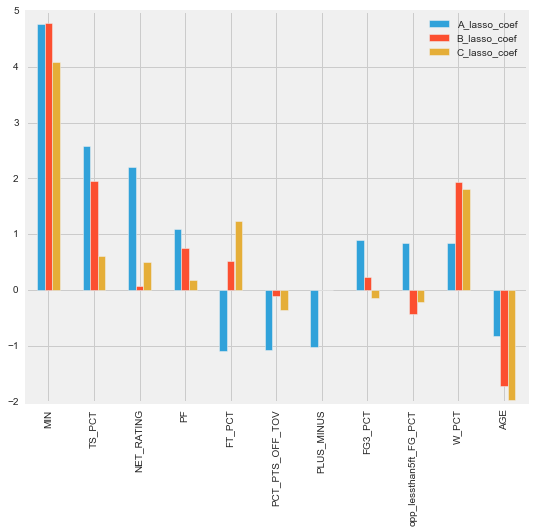

In [27]:
# Plot beta values side by side
tmp = ABC_lasso.iloc[0:11, :-1]

fig, ax = plt.subplots(figsize=(8,7))

tmp.plot(kind='bar', ax=ax)
ax.set_xticklabels(tmp.variable.values, )

plt.show()

In [26]:
BCA_lasso = pd.merge(B_lasso_coefs, C_lasso_coefs, on='variable').merge(A_lasso_coefs, on='variable')
BCA_lasso['Total Magnitude of betas'] = BCA_lasso['A_lasso_abs_coef'] + BCA_lasso['B_lasso_abs_coef'] + BCA_lasso['C_lasso_abs_coef']
BCA_lasso.drop([col for col in BCA_lasso.columns if 'abs' in col], axis=1, inplace=True)
BCA_lasso.head(20)

,B_lasso_coef,variable,C_lasso_coef,A_lasso_coef,Total Magnitude of betas
0,4.780706,MIN,4.082551,4.763442,13.626699
1,-2.146655,USG_PCT,-1.602035,-0.000000,3.748690
2,1.945262,TS_PCT,0.600187,2.578580,5.124029
3,1.941798,W_PCT,1.806945,0.832879,4.581621
4,-1.718908,AGE,-1.979468,-0.819586,4.517961
5,1.164693,opp_lessthan5ft_FGA,0.000000,-0.000000,1.164693
6,0.946081,20_24ft_FG_PCT,0.268057,0.031087,1.245225
7,-0.876452,PLAYER_HEIGHT_INCHES,-0.000000,-0.000000,0.876452
8,0.834575,PCT_PTS_PAINT,0.039761,0.000000,0.874336
9,-0.779710,BLKA,0.000000,0.000000,0.779710


In [ ]:
tmp = BCA_lasso.iloc[0:15, :-1]

fig, ax = plt.subplots(figsize=(10,7))

tmp.plot(kind='bar', ax=ax)
ax.set_xticklabels(tmp.variable.values, )

plt.show()

In [ ]:
CBA_lasso = pd.merge(C_lasso_coefs, B_lasso_coefs, on='variable').merge(A_lasso_coefs, on='variable')
CBA_lasso['Total Magnitude of betas'] = CBA_lasso['A_lasso_abs_coef'] + CBA_lasso['B_lasso_abs_coef'] + CBA_lasso['C_lasso_abs_coef']

CBA_lasso.drop([col for col in CBA_lasso.columns if 'abs' in col], axis=1, inplace=True)
CBA_lasso.head(20)

In [ ]:
# Sort based on Total Magnitude of betas 
CBA_lasso.sort_values('Total Magnitude of betas', ascending=False)

In [ ]:
tmp = CBA_lasso.iloc[:10,:-1]

fig, ax = plt.subplots(figsize=(10,7))

tmp.plot(kind='bar', ax=ax)
ax.set_xticklabels(tmp.variable.values, )

plt.show()

# Common betas in all 3 eras: 
- MIN
- W_PCT
- NET_RATING
- TS_PCT
- AGE(NEGATIVE) 


- Features that fit my assumption 
    - Age is indirectly correlated with Games played. 
    - W_PCT: players who win more tend to play through pain/injury
        - 2015-16 Season: Golden State Warriors(highest) vs Philadelphia 76ers(lowest)
        
- Features that didn't go along with assumptions:
    - Minutes played: Initially thought the more minutes played the less games you played but superstars like 
    Lebron James, Kobe Bryant and Allen Iverson play high volume of minutes and don't get injured. 
        - BUT there is a slight trend of Lasso Beta values associated with MIN across three eras has decreased. 
        Possible reason for this may be that players minutes are monitored and managed by coaching staff
        leading to less time for starters and an increase in bench players minutes in order to minimize potential
        injuries to star players.   


In [ ]:
significant_col = ['PLAYER_NAME', 'TEAM_ABBREVIATION','SEASON', 'AGE', 'GP' , 'W', 'L', 'W_PCT', 'MIN', 'FT_PCT', 'lessthan5ft_FGA',
                  'NET_RATING', 'USG_PCT', 'TS_PCT']

# Comparison: Young Kobe Bryant (2001-02) vs Old Kobe (2014-15)

I compared Young and Old Kobe Bryant based on following features: 
    - Average MPG(Minutes per game)
    - Games played 
    - Win percentage
    - True Shooting Percentage
    
    

In [ ]:
old_kobe = kobe[kobe.SEASON == 2014][['AGE', 'MIN', 'GP']]
young_kobe = kobe[kobe.SEASON == 2001][['AGE',  'MIN', 'GP']]

tmp = old_kobe.T.rename(columns={755: 'Stats'})
tmp2 = young_kobe.T.rename(columns={6152: 'Stats'})
tmp['SEASON'] = 2014
tmp2['SEASON'] = 2001
all_tmp = pd.concat([tmp,tmp2]).reset_index().rename(columns={'index':'variable'})


# fig, ax = plt.subplots(figsize=(10,7))
g = sns.factorplot(x="variable", y="Stats", hue="SEASON", data=all_tmp,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Features")
all_tmp

In [ ]:
old_kobe = kobe[kobe.SEASON == 2014][['W_PCT', 'TS_PCT']]
young_kobe = kobe[kobe.SEASON == 2001][['W_PCT', 'TS_PCT']]

tmp = old_kobe.T.rename(columns={755: 'Stats'})
tmp2 = young_kobe.T.rename(columns={6152: 'Stats'})
tmp['SEASON'] = 2014
tmp2['SEASON'] = 2001
all_tmp = pd.concat([tmp,tmp2]).reset_index().rename(columns={'index':'variable'})

# fig, ax = plt.subplots(figsize=(10,7))
g = sns.factorplot(x="variable", y="Stats", hue="SEASON", data=all_tmp,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Features")

all_tmp

# Compare Highest W_PCT teams vs Lowest with Games played

### Golden State Warriors vs Philadelphia 76ers in 2015-16 Season

In [ ]:
season = df_all[(df_all.SEASON >= 2013) & (df_all.SEASON <= 2015) ]
warriors = season[season['TEAM_ABBREVIATION'] == 'GSW'][significant_col]
philadelphia = season[season['TEAM_ABBREVIATION'] == 'PHI'][significant_col]

In [ ]:
tmp = pd.DataFrame(warriors[['W_PCT', 'GP']].mean()).reset_index().rename(columns={0: 'Mean'})
tmp['Team'] = 'GSW'
tmp2 = pd.DataFrame(philadelphia[['W_PCT', 'GP']].mean()).reset_index().rename(columns={0: 'Mean'})
tmp2['Team'] = 'PHI'

all_tmp = pd.concat([tmp,tmp2]).reset_index()
gp = all_tmp[all_tmp['index'] == 'GP']
w_pct = all_tmp[all_tmp['index'] == 'W_PCT']

g = sns.factorplot(x="index", y="Mean", hue="Team", data=gp,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Features")

g = sns.factorplot(x="index", y="Mean", hue="Team", data=w_pct,
                   size=6, kind="bar", palette="muted",)
g.despine(left=True)
g.set_xlabels("Features")

print 'Philadelphia players average GP: ', philadelphia.GP.mean()
print 'Warriors players average GP: ', warriors.GP.mean()

print 'Philadelphia players average W_PCT: ', philadelphia.W_PCT.mean()
print 'Warriors players average W_PCT: ', warriors.W_PCT.mean()

all_tmp

In [ ]:
season = df_all[df_all.SEASON == 2015]
warriors = season[season['TEAM_ABBREVIATION'] == 'GSW'][significant_col]
philadelphia = season[season['TEAM_ABBREVIATION'] == 'PHI'][significant_col]
print "Warriors total games played in 2015: ", warriors[['GP']].sum().values[0]
print "76ers total games played in 2015: ", philadelphia[['GP']].sum().values[0]
print "Difference in GP: ", (warriors[['GP']].sum() - philadelphia[['GP']].sum()).values[0]

In [ ]:
print 'Philadelphia average GP: ', philadelphia.GP.mean()
print 'Warriors average GP: ', warriors.GP.mean()

print 'Philadelphia average W_PCT: ', philadelphia.W_PCT.mean()
print 'Warriors average W_PCT: ', warriors.W_PCT.mean()

# Minutes Played. Lasso Coefficients Decrease accross eras from late 90's to now.
- Minutes played has direct relationship with Games played but we see beta values are decreasing in magnitude over time. 
    - Possible reasons: Average Minutes per game from late 90's till present is decreasing



In [ ]:
# Subsetting starters to find trend of minutes accross each era all_data_A, all_data_B, all_data_C
def starters(df, num_of_players=10, column=['MIN'], min_games=10):
    df = df[df.GP >= min_games]
    return df.sort_values(by=column, ascending=False)[:num_of_players]

group_A = all_data_A.groupby('TEAM_ABBREVIATION').apply(starters)
group_B = all_data_B.groupby('TEAM_ABBREVIATION').apply(starters)
group_C = all_data_C.groupby('TEAM_ABBREVIATION').apply(starters)

In [ ]:
# Earlier Eras A and B or years prior 2007 show a steady average in minutes 
# The Era 2010 and above has shown a significant decrease from earlier Eras prior 2007
print "Minutes per game Average for Era A: ", group_A[['MIN']].mean().values[0]
print "Minutes per game Average for Era B: ", group_B[['MIN']].mean().values[0]
print "Minutes per game Average for Era C: ", group_C[['MIN']].mean().values[0]


In [ ]:
tmp = df_all.groupby('TEAM_ABBREVIATION').apply(starters)
past = tmp[tmp.SEASON <= 2000]
present = tmp[tmp.SEASON > 2010]


fig, ax = plt.subplots(figsize=(10,7))

pd.DataFrame([present[['MIN']].mean(), past[['MIN']].mean()]).plot(kind='barh', color='c',ax=ax)

plt.show()

print "Average Minutes played Pre 2000's: %.2f MPG" % past[['MIN']].mean().values[0]
print "Average MPG from 2010 and on: %.2f MPG" % present[['MIN']].mean().values[0]
print "Average MPG has decreased by: %.2f MPG" % (past[['MIN']].mean().values[0] - present[['MIN']].mean().values[0])


# Conclusion:

- The top 5 attributes associated with games played are:  
    - MIN
    - W_PCT
    - NET_RATING
    - TS_PCT
    - AGE

